# Importing Libraries


In [ ]:
#sequential API to create models
from keras.models import Sequential

#Component to create a model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

#Stochastic Gradient Desent Algorithm
from keras.optimizers import SGD

#keras already hosted MNIST dataset
from keras.datasets import mnist

#An keras utility to binarize integers
from keras.utils import to_categorical

#An keras utility to visualize model graph
from keras.utils import plot_model

#Another ML library that has many utilities for image operation
import skimage

from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np



#Hyperparameters


In [ ]:
#Whole dataset splits into batches
batch_size= 128

#Number of labels of our dataset
nb_classes=10

#Number of times we want to train the model
nb_epoch = 10

#Load Data

In [ ]:
# load MNIST dataset
# Data split into two subset : Training and Test
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(len(X_train))
print(len(Y_train))

60000
60000


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

#Visualize Data

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape


(10000, 28, 28)

#Visualize Data

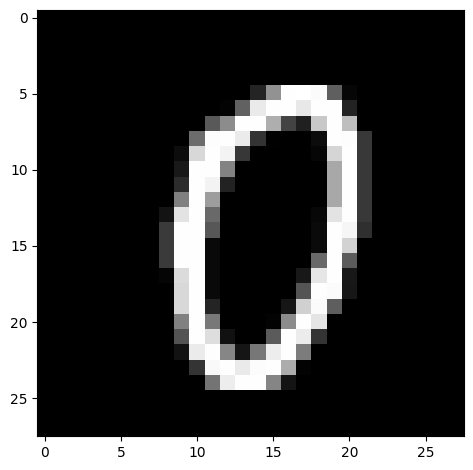

In [ ]:
randomimage=X_train[1000]
imshow(randomimage)

In [ ]:
print(randomimage)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

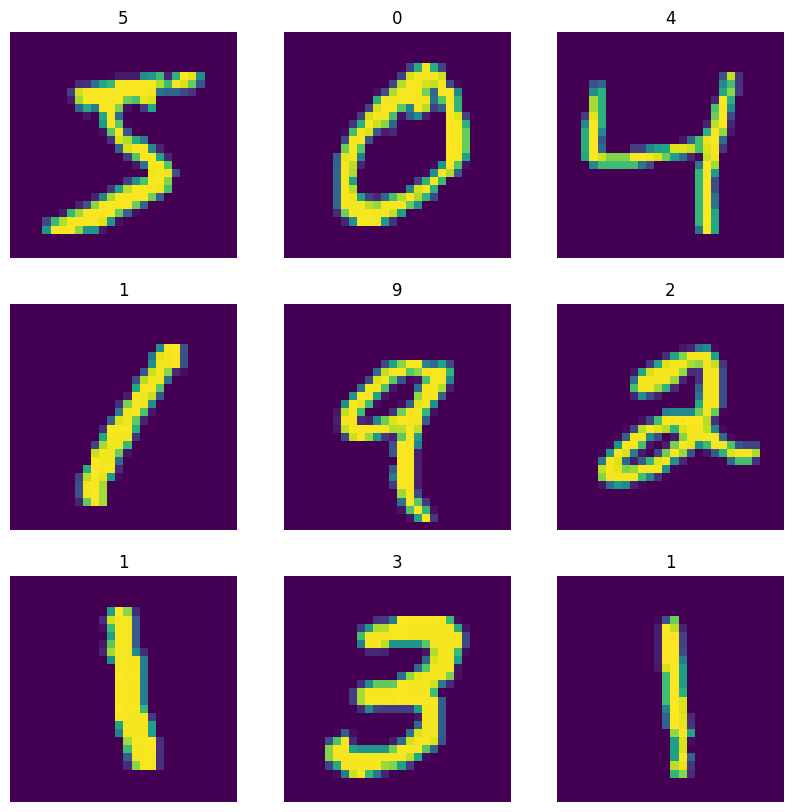

In [ ]:
#define figure size
plt.figure(figsize=(10,10))

for i in range(9):
  ax = plt.subplot(3,3,i+1)

  an_image = X_train[i]
  plt.imshow(an_image)
  plt.title(int(Y_train[i]))
  plt.axis("off")



#Changing Datatype


In [ ]:
#inquire data type
print(X_train.dtype)
print(X_test.dtype)

#change the datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#new data type
print('new datatype: ',X_train.dtype)
print('new datatype: ',X_test.dtype)


uint8
uint8
new datatype:  float32
new datatype:  float32


#Rescaling Data


In [ ]:
#Get a rnadom sample
a_sample = X_train[0]

print("min value of sample: ", a_sample.min())
print("max value of sample: ", a_sample.max())

min value of sample:  0.0
max value of sample:  255.0


In [ ]:
#devide each value in train and test data by 255
X_train /= 255
X_test /= 255

In [ ]:
a_sample = X_train[0]

print("min value of sample: ", a_sample.min())
print("max value of sample: ", a_sample.max())

min value of sample:  0.0
max value of sample:  1.0


# Reshape train and test data in 4d


In [ ]:
# image shapes should be (28,28,1)

#We want to expand a dimension at the end
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)
print(X_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Binarize labels

In [ ]:
#Display the trainning labels
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# shape of trainning label
Y_train.shape

(60000,)

In [ ]:
#A random Array
input_array = np.array([0,1,2,3,4,5,6,7,8,9])
print(input_array)

#apply to categorical to the random array
output = to_categorical(input_array, num_classes=10)

print(output)
print("Input list shape",input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Input list shape (10,)


In [ ]:
#Apply to_categorical to train labels
Y_train = to_categorical(Y_train,nb_classes)

#Apply to_categorical to test labels
Y_test = to_categorical(Y_test,nb_classes)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#Define Model

In [ ]:
# Define a input shape for our CNN
input_shape = (28,28,1)

In [ ]:
#keras provides a sequential API to create models
model = Sequential()

#Define the input layer
model.add(Input(shape=input_shape))

#1st conv layer (32 features, kernel=filters,  )
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#1st pooling layer (maxpooling layer found the maximum value)
model.add(MaxPooling2D(pool_size =(2,2)))

#2nd Conv layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

#2nd pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten our 4d tensor to 1d
model.add(Flatten())

#Last Dense layer to make classification
model.add(Dense(nb_classes, activation='softmax'))

#Compile Model

In [ ]:
# choose learning rate
learning_rate=0.001

# Select optimizer
Optimizer = SGD(learning_rate = learning_rate)

#Select loss Function
loss='categorical_crossentropy'

#Select evaluation matrics
metrics = ['accuracy']

#Model compilation
model.compile(optimizer=Optimizer, loss=loss, metrics=metrics)

#Visualize model


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)               

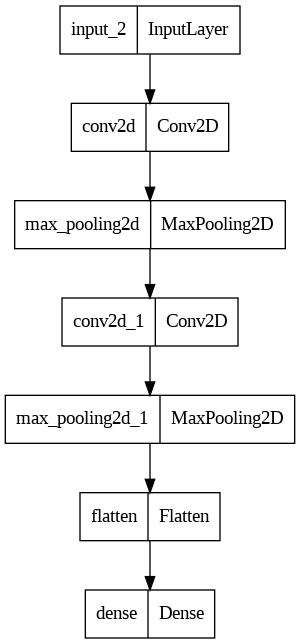

In [ ]:
plot_model(model)

#Model Training

In [ ]:
#Train
history = model.fit(X_train,Y_train,epochs=nb_epoch,batch_size=batch_size)


Epoch 1/10
469/469 [==============================] - 41s 84ms/step - loss: 2.2791 - accuracy: 0.1636
Epoch 2/10
469/469 [==============================] - 40s 84ms/step - loss: 2.2127 - accuracy: 0.3687
Epoch 3/10
469/469 [==============================] - 40s 85ms/step - loss: 2.0951 - accuracy: 0.5425
Epoch 4/10
469/469 [==============================] - 41s 88ms/step - loss: 1.8329 - accuracy: 0.6709
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 1.3487 - accuracy: 0.7391
Epoch 6/10
469/469 [==============================] - 43s 91ms/step - loss: 0.9057 - accuracy: 0.7974
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.6743 - accuracy: 0.8305
Epoch 8/10
469/469 [==============================] - 40s 85ms/step - loss: 0.5569 - accuracy: 0.8522
Epoch 9/10
469/469 [==============================] - 41s 87ms/step - loss: 0.4890 - accuracy: 0.8665
Epoch 10/10
469/469 [==============================] - 41s 86ms/step - loss: 0.445

#Inference on Test Data

In [ ]:
#Evaluate
evaluation = model.evaluate(X_test,Y_test)

#Display test statistics
print("summary: loss over the test dataset: %2f, Accuracy: %2f" % (evaluation[0]*100,evaluation[1]*100))

313/313 [==============================] - 3s 8ms/step - loss: 0.4066 - accuracy: 0.8882
summary: loss over the test dataset: 40.663141, Accuracy: 88.819999


<function matplotlib.pyplot.show(close=None, block=None)>

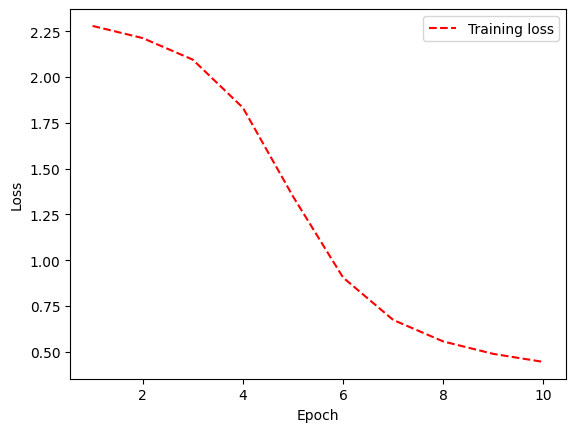

In [ ]:
#Get trainning loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

#Visualize loss history
plt.plot(epoch_count,training_loss, 'r--')
plt.legend(['Training loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

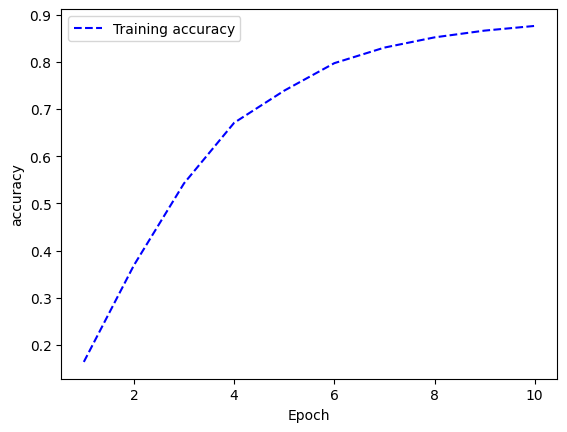

In [ ]:
#Get trainning Accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy)+1)

#Visualize loss history
plt.plot(epoch_count,training_accuracy, 'b--')
plt.legend(['Training accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show